In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
import seaborn as sns
%matplotlib inline

df = pd.read_csv("train.csv")

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


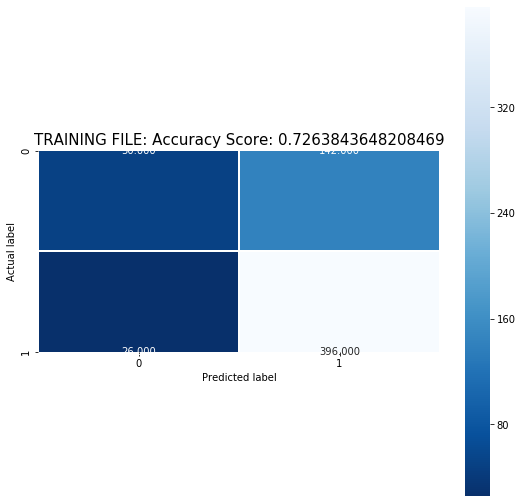

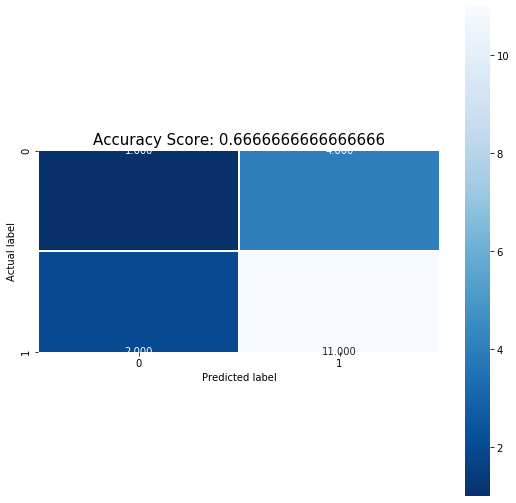

In [28]:
df.iloc[:, 1:12]
df.loc[:, ['Loan_Status']]

x = df.iloc[:, 1:12]
y = df.loc[:, ['Loan_Status']]

x = x.values
y = y.values
y = y.ravel()

model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=7, p=2, weights='uniform')
model.fit(x, y)
yPred = model.predict(x)

plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'TRAINING FILE: Accuracy Score: {0}'.format(sm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

df2 = pd.read_csv("test.csv") 

df2['Gender'].fillna(df2['Gender'].mode()[0], inplace=True)
df2['Married'].fillna(df2['Married'].mode()[0], inplace=True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0], inplace=True)
df2['Self_Employed'].fillna('No',inplace=True)
df2['LoanAmount'].fillna(df2['LoanAmount'].mode()[0], inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode()[0], inplace=True)
df2['Credit_History'].fillna(df2['Credit_History'].mode()[0], inplace=True)

var_mod2 = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le2 = LabelEncoder()
for i in var_mod2:
    df2[i] = le2.fit_transform(df2[i])

x2 = df2.iloc[:, 1:12]
y2 = df2.loc[:, ['Loan_Status']]
yPred2 = model.predict(x2)

# Seaborn #Run at new python 3
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size = 15);


Text(0.5, 1.0, 'Loan: K-NN Classification')

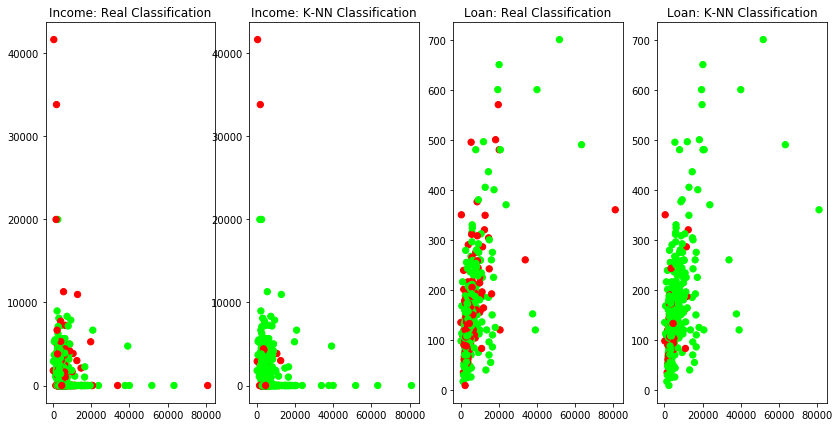

In [23]:
xVisual = pd.DataFrame(x)

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])

# Plot the Original Classifications
plt.subplot(1, 4, 1)
plt.scatter(xVisual.iloc[:,5],xVisual.iloc[:,6], c=colormap[y], s=40)
plt.title('Income: Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 4, 2)
plt.scatter(xVisual.iloc[:,5],xVisual.iloc[:,6], c=colormap[yPred], s=40)
plt.title('Income: K-NN Classification')

# Plot the Original Classifications
plt.subplot(1, 4, 3)
plt.scatter(xVisual.iloc[:,5],xVisual.iloc[:,7], c=colormap[y], s=40)
plt.title('Loan: Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 4, 4)
plt.scatter(xVisual.iloc[:,5],xVisual.iloc[:,7], c=colormap[yPred], s=40)
plt.title('Loan: K-NN Classification')


